# A simple Bucket Hydrology Model
## 4/11/2018
## Runga-Kutta 4 method
### Day 2  --> add W2, W3 and soil data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('soil_moisture_OK.csv', names=['Y','M','D','P', 'SM_2', 'SM_4', 'SM_8', 'SM_20', 'SM_40'], skiprows=1)

### look at the first 20 rows to make sure data is correctly imported and stored
qrows = np.concatenate([np.arange(0,10,1),np.arange(-11,-1,1)])     # look at first/last 10 rows to check data
df.iloc[qrows,:]    # display first/last 10 rows, all columns

,Y,M,D,P,SM_2,SM_4,SM_8,SM_20,SM_40
0,2010,1,1,0.000,31.9,37.8,28.3,26.1,9.6
1,2010,1,2,0.000,32.2,37.4,28.7,26.8,9.9
2,2010,1,3,0.000,32.0,36.9,28.1,26.5,9.5
3,2010,1,4,0.000,31.6,36.4,28.2,27.1,9.6
4,2010,1,5,0.000,31.6,36.7,27.7,26.9,9.7
5,2010,1,6,0.000,31.3,36.3,27.8,26.9,9.7
6,2010,1,7,0.000,31.5,36.1,27.7,27.5,9.7
7,2010,1,8,0.000,31.0,30.2,27.7,27.4,9.5
8,2010,1,9,0.000,30.8,20.1,27.5,27.1,9.5
9,2010,1,10,0.000,30.5,17.5,27.4,27.1,9.5


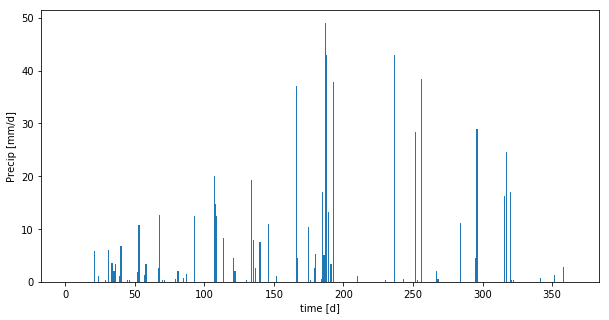

49.022


In [7]:
Nt = len(df)
dt = 1.0

#P = np.zeros((Nt, 1))   # length Nt, width 1
#P[19:39] = 4.0          # precip event from 20-40, with P = 4.0

P = df['P'].values

t = np.arange(1, Nt+1, 1)

plt.figure(1)
plt.figure(figsize=(10,5)) 
plt.bar(t, P)
plt.ylabel('Precip [mm/d]')
plt.xlabel('time [d]')
plt.show()

print(max(P))


In [10]:
# define parameters

k1 = 0.05      # drainage coeff. units [day^-1]
k2 = 0.03
k3 = 0.02
W1_0 = 250.0   # Storage --> units [mm]
W2_0 = 200.0
W3_0 = 150.0

# initialize W1 w/zeros for computing  -> data container for our water storage at each time step
W1 = np.zeros(t.shape)   # this is where we will put our answers
W2 = np.zeros(t.shape)
W3 = np.zeros(t.shape)

print(W1.shape)
print(W2.shape)
print(W3.shape)

# update initial condition
W1[0] = W1_0
W2[0] = W2_0
W3[0] = W3_0

# initialize a data container for discharge at each time step
Q = np.zeros(t.shape)
Qb = np.zeros(t.shape)

# update initial condition
Q[0] = k1*W1[0]
Qb[0] = k3*W3[0] 

# the main loop  --> start at timestep 1, go to end
for i in np.arange(1, Nt, 1):    # start at 1, go to Nt, by step of 1

    # compute value of derivatives
    dw1dt = P[i-1] - k1*W1[i-1]
    
    # Compute the next value of W
    W1[i] = W1[i-1] + dw1dt*dt
    
    # Compute the next value of Q
    Q[i] = k1*W1[i]
    
    #  W2
    dw2dt = k1*W1[i-1] - k2*W2[i-1]
    W2[i] = W2[i-1] + dw2dt*dt
        
    # W3
        
    dw3dt = k2*W2[i-1] - k3*W3[i-1]
    W3[i] = W3[i-1] + dw3dt*dt
    Qb[i] = k3*W3[i]
            
            
    
    

(365,)
(365,)
(365,)


(365,)


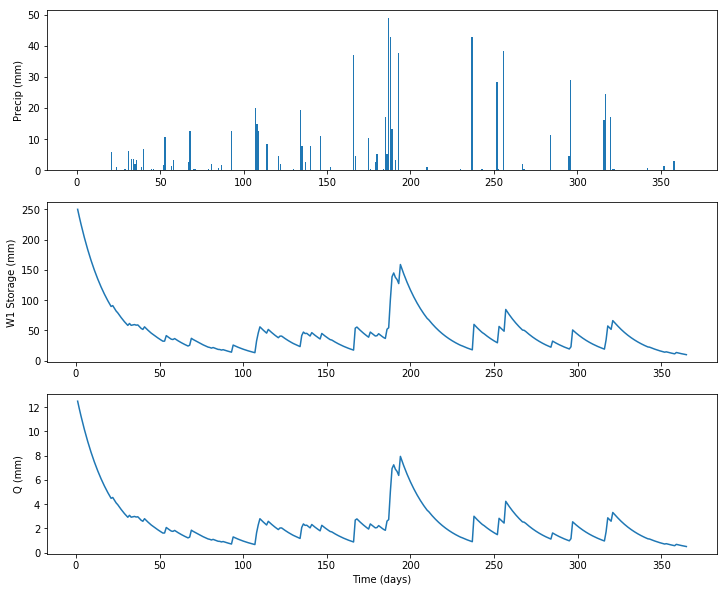

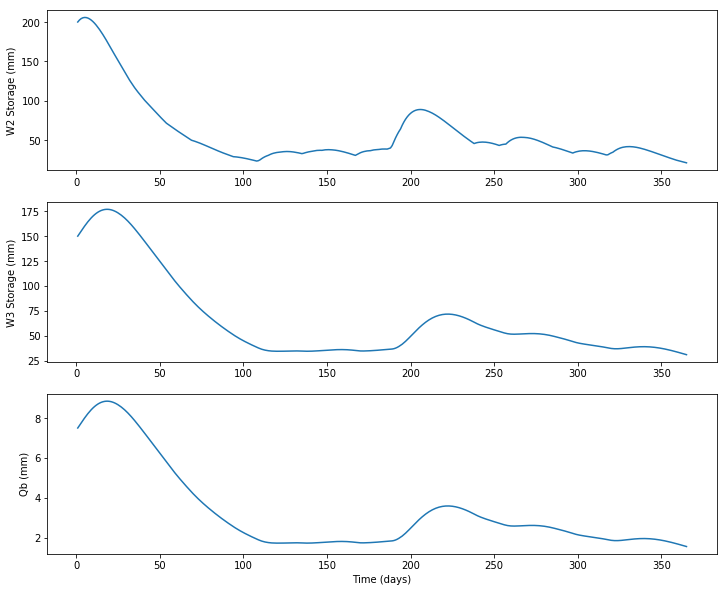

In [9]:
print(W1.shape)

plt.figure(2)
plt.figure(figsize=(12,10)) 
plt.subplot(311)
plt.bar(t, P)
plt.ylabel('Precip (mm)')
plt.subplot(312)
plt.plot(t, W1)
plt.ylabel('W1 Storage (mm)')
plt.subplot(313)
plt.plot(t, Q)
plt.ylabel('Q (mm)')
plt.xlabel('Time (days)')
plt.show()

plt.figure(3)
plt.figure(figsize=(12,10))
plt.subplot(311)
plt.plot(t, W2)
plt.ylabel('W2 Storage (mm)')
plt.subplot(312)
plt.plot(t, W3)
plt.ylabel('W3 Storage (mm)')
plt.subplot(313)
plt.plot(t, Qb)
plt.ylabel('Qb (mm)')
plt.xlabel('Time (days)')
plt.show()
